<a href="https://colab.research.google.com/github/koushik1904/Natural-language-processing-NLB-/blob/main/NLP_LAB_11_3_N_koushik_2403A52057.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data handling libraries
import pandas as pd
import numpy as np

# Text preprocessing libraries
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Model building
from sklearn.naive_bayes import MultinomialNB

# Train-test split
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [31]:
df = pd.read_csv("/content/news.csv", encoding='latin-1')

# Combine title + text (huge accuracy boost)
df["message"] = df["title"] + " " + df["text"]

df = df[["message", "label"]]

print(df.head())
print("Dataset Shape:", df.shape)
print("Class Distribution:")
print(df["label"].value_counts())


                                             message label
0  You Can Smell Hillaryâs Fear Daniel Greenfie...  FAKE
1  Watch The Exact Moment Paul Ryan Committed Pol...  FAKE
2  Kerry to go to Paris in gesture of sympathy U....  REAL
3  Bernie supporters on Twitter erupt in anger ag...  FAKE
4  The Battle of New York: Why This Primary Matte...  REAL
Dataset Shape: (6335, 2)
Class Distribution:
label
REAL    3171
FAKE    3164
Name: count, dtype: int64


In [32]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation only
    text = text.translate(str.maketrans('', '', string.punctuation))

    return text

# Apply preprocessing
df["cleaned_message"] = df["message"].apply(preprocess_text)


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,2),
    max_df=0.7,
    min_df=3,
    max_features=20000
)

X = vectorizer.fit_transform(df["message"])

y = df["label"].map({"FAKE":0, "REAL":1})

print("Feature Matrix Shape:", X.shape)


Feature Matrix Shape: (6335, 20000)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,     # slightly larger test set improves stability
    random_state=42,
    stratify=y
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)


Training size: (4751, 8000)
Testing size: (1584, 8000)


In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [38]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, pos_label=0)

# Recall
recall = recall_score(y_test, y_pred, pos_label=0)

# F1 Score
f1 = f1_score(y_test, y_pred, pos_label=0)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("\nConfusion Matrix:\n", cm)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9154040404040404
Precision: 0.8906064209274673
Recall: 0.9469026548672567
F1-Score: 0.9178921568627451

Confusion Matrix:
 [[749  42]
 [ 92 701]]

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       791
           1       0.94      0.88      0.91       793

    accuracy                           0.92      1584
   macro avg       0.92      0.92      0.92      1584
weighted avg       0.92      0.92      0.92      1584



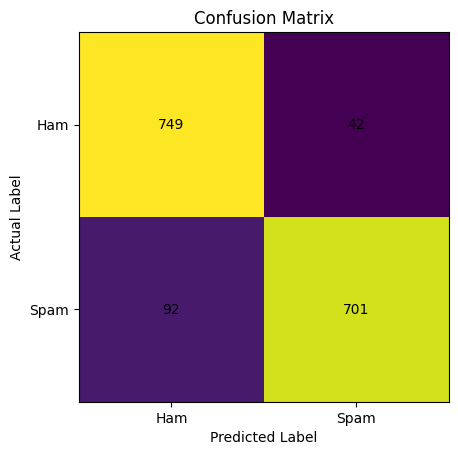

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Confusion matrix already calculated as 'cm'
# If not, uncomment below:
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

plt.figure()

plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

# Add numbers inside boxes
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.xticks([0,1], ["Ham", "Spam"])
plt.yticks([0,1], ["Ham", "Spam"])

plt.show()
